# Import libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Loading the Dataset

In [28]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Process Dataset

In [30]:
# drop columns that have no role in prediction
data = data.drop(['Unnamed: 32', 'id'], axis=1)

# Map B to 0 and M to 1 for logistic regression
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M':1})

# Input and Output Data

In [31]:
# extracts target variables
y = data['diagnosis'].values
x_data = data.drop(['diagnosis'], axis=1)

# Normalization

In [32]:
# normalizing the data - to ensure that each feature contributes equally to the model and prevent features with large values from having a dominating effect simply due to their scale.

x = (x_data - x_data.min()) / (x_data.max() - x_data.min())

# Split Data for Training and Testing

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42) # 15% data will be utilized for testing and the rest will be for training.

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


# Weight and Bias

In [34]:
def initialize_weights_and_bias(dimension):
    w = np.random.randn(dimension, 1) * 0.01
    b = 0.0
    return w, b

# Signmoid Function

In [35]:
def sigmoid(z):
  y_head = 1 / (1 + np.exp(-z))
  return y_head

# Forward - Backward Propagation

In [36]:
def forward_backward_propagation(w, b, x_train, y_train):
    m = x_train.shape[1]

    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)

    loss = y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head)


    cost = (-1/m) * np.sum(loss)

    # backward propagation
    derivative_weight = (1/m) * np.dot(x_train, (y_head - y_train).T)
    derivative_bias = (1/m) * np.sum(y_head - y_train)

    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    return cost, gradients

# Update Parameters

In [37]:
def update(w, b, x_train, y_train, learning_rate, num_iterations):
    cost_1 = []
    cost_2 = []
    index = []

    gradients = {}
    for i in range(num_iterations):
        cost, grad = forward_backward_propagation(w, b, x_train, y_train)
        cost_1.append(cost)

        w -= learning_rate * grad["derivative_weight"]
        b -= learning_rate * grad["derivative_bias"]

        if i % 100 == 0:
            cost_2.append(cost)
            index.append(i)
            print(f"Cost after iteration {i}: {cost}")

    parameters = {"weight": w, "bias": b}

    plt.plot(index, cost_2)
    plt.xticks(index, rotation = 'vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_1

# Predict

In [38]:
def predict(w, b, x_test):

    # x_test is an input for forward propagation
    m = x_test.shape[1]
    y_prediction = np.zeros((1, m))
    z = sigmoid(np.dot(w.T, x_test) + b)

    # if z > 0.5, prediction is 1, 0 otherwise

    for i in range(z.shape[1]):
        y_prediction[0, i] = 1 if z[0, i] > 0.5 else 0

    return y_prediction

# Logistic Regression

Cost after iteration 0: 0.6949744680846962
Cost after iteration 100: 0.6671067342275139
Cost after iteration 200: 0.6424730836594478
Cost after iteration 300: 0.6199795220521142
Cost after iteration 400: 0.5992694187372343
Cost after iteration 500: 0.5801453417343202
Cost after iteration 600: 0.5624519605483197
Cost after iteration 700: 0.5460526226377006
Cost after iteration 800: 0.5308244644479512
Cost after iteration 900: 0.5166569371932747


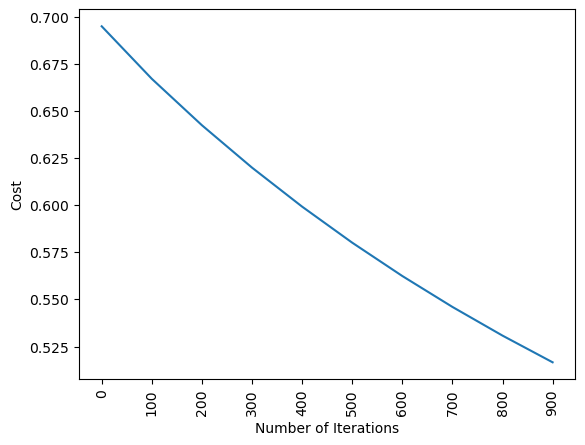

Train accuracy: 90.89026915113871%
Test accuracy: 88.37209302325581%


In [39]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=1000):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)
    parameters, gradients, costs = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    print(f"Train accuracy: {100 - np.mean(np.abs(y_prediction_train - y_train)) * 100}%")
    print(f"Test accuracy: {100 - np.mean(np.abs(y_prediction_test - y_test)) * 100}%")

logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.01, num_iterations=1000)